## < *Project = 선진국의 공유자전거 이용 현황 분석 및 이용자 예측* >
 - - -
 - ### **진행 배경**

  1. 모빌리티 사업 내 공유 경제/구독 서비스의 사업 확대 증가  

  2. 모빌리티 다양화 및 시장 선점을 위한 사업 확대 (자전거, 스쿠터)  
　※ 목적 : 변화하는 모빌리티 개념 및 수요 맞춤형 서비스 제공을 통한 고객 정보 확보  
　　　　　(관련 용어 : 마이크로 모빌리티, 퍼스널 모빌리티, 라스트 마일)  
　※ 대표 업체 : Lyft, Uber, Bolt, Lime (이상 해외), Elecle, HMC 등  

  3. COVID-19로 인한 모빌리티 사업 영향 : 공유 경제 수익성 악화 및 변화 필요
  　  
      ![Lyft : Bay Wheels](https://drive.google.com/uc?export=view&id=1_8iYSnSkw0gsmSogk4b_yyLPTlVb_pDl)  
      *Lyft, Bay Wheels*

 * * *
 - ### **국내 상황**
  1.  공공 기관 중심의 공유 자전거 사업 진행 중 (Ex. 서울시, 따릉이)  
  2.  사기업의 공유 자전거 사업 확대 (Ex. S-oil 주유소, 전기 자전거 대여 서비스)  
  3.  해외 대비 고객 이용 데이터 확보 미흡 → 사업성 검토/확대 어려움  
    
    ![S-oil](https://drive.google.com/uc?export=view&id=1BJP0Z414_YjY2oswB_JkqU538_1pEs07)  
    *S-oil X elecle*

 - ### **프로젝트 목표**

  1. 공유 자전거 이용 Data set 설명할 머신 러닝 모델 준비   
  2. 모델 학습을 통한 예측 성능 확인

 * * *
 - ### **프로젝트 진행 순서**

   **1. 데이터 선정 및 문제 정의**
    - 해당 데이터 선택 이유
    - M/L 접근 방향 (분류 / 회귀)

  **2. 기준 모델 및 평가 지표 설정**
   - target 특성 선정 및 이유
   - 기준 모델, 평가 지표 선정 이유

  **3. 데이터 전처리 진행**
   - EDA, Wrangling, Feature Engineering 등

  **4. M/L 모델 적용 및 검증**
   - 예측 모델 다양화 및 학습 결과 비교 (기준 모델 포함)
   - 성능 개선 진행
   - 최종 모델 선정 및 성능 (평가 지표)

  **5. N/L 모델 해석**
   - PDP, SHAD를 활용한 시각화 및 설명
  
  **6. 마무리 및 결과 정리**
   - 성능 결과 분석

* * *
#### **1. 데이터 선정 및 문제 정의**
   - 해당 데이터 선택 이유  
    + 업체 : ***Lyft*** (북미 공유 자전거 사업 업체 중 하나 : 규모 및 이력 상위권)  
    + 데이터 : 이용 시간, 정류소 정보, 지리 정보, 회원 여부 (수치형, 범주형 포함)  
    　　　→ 단, 날씨 정보 미제공  

   - M/L 접근 방향 (분류 / 회귀)
    + Machine Learning 접근 방향 : 분류
    + 이유 : 1) 데이터 분석 기반, COVID-19에 따른 회원수 변화 정도 예측  
   　　　2) 예측과 실제 비교 및 성능 확인

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#!pip install -U pandas-profiling
from pandas_profiling import ProfileReport

#!pip install --upgrade category_encoders
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder

#from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

#! pip3 install xgboost
from xgboost import XGBClassifier

#! pip install haversine
from haversine import haversine

#! pip install pdpbox  # 설치 후 재시작 필요
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

#! pip install shap
import shap

#! pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 분석에 사용할 데이터 불러오기 (이용 정보 및 날씨)

# (출처 : https://www.lyft.com/bikes/bay-wheels/system-data)
baywheel01 = '/content/drive/MyDrive/202101-baywheels-tripdata.csv' # 1월
baywheel02 = '/content/drive/MyDrive/202102-baywheels-tripdata.csv' # 2월
baywheel03 = '/content/drive/MyDrive/202103-baywheels-tripdata.csv' # 3월

# (출처 : https://www.wunderground.com/history/daily/us/ca/san-francisco/KSFO/)
sf_weather = '/content/drive/MyDrive/weather inform..xlsx'

In [4]:
# 2021년 Bay wheels 1월~3월 데이터 정보 확인
bay01 = pd.read_csv(baywheel01)
bay02 = pd.read_csv(baywheel02)
bay03 = pd.read_csv(baywheel03)

In [5]:
# San Francisco 날씨 데이터 수집 및 불러오기 
weather01 = pd.read_excel(sf_weather, sheet_name='Jan1')
weather02 = pd.read_excel(sf_weather, sheet_name='Feb2')
weather03 = pd.read_excel(sf_weather, sheet_name='Mar3')

In [ ]:
# Bay wheels 서비스 지역 중 San Francisco 지역 선정 (가장 활성화된 지역)
bay01.T # 102363 rows × 13 columns
bay02.T # 111073 rows × 13 columns
bay03.T # 131960 rows × 13 columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,131920,131921,131922,131923,131924,131925,131926,131927,131928,131929,131930,131931,131932,131933,131934,131935,131936,131937,131938,131939,131940,131941,131942,131943,131944,131945,131946,131947,131948,131949,131950,131951,131952,131953,131954,131955,131956,131957,131958,131959
ride_id,2DF89AABE9E566FD,C5AF654BDB7A2F42,CC19B638AE298FED,3FCA456D3201C122,4011F257450EF99C,EC5F15EF35C5C8CC,783ABC614DDB4826,D701B1D3A549AE63,C71A5C70BA0E7749,ABA3901C1726B06A,DE82DE346DFA2917,62B2E75DBFE68FFE,06C624CF8BFF2A31,3AA0E2679F037ED1,44329F85A15C3274,9E1BBF8334AEF286,25EB2CCC800CB664,A7F6DB8898C722F5,5E694D8144226646,0887C12D8DBB2968,C06F76BA3D7ED299,628E847BF55CFBAD,CE18589BEE08EA9E,01086E3375864E0F,7C9CB4DA6106FD20,618E7C29A241AC55,45012195402ED3CD,244916BDAA7CE92E,0AB72CDE76E6E638,00E007BAA1B39733,31B9577CD8EE4E85,7B09325040018640,43C7FFE9EBB1B69D,7D167634937EAC0C,ABC26A3C0CFD1AE1,AD10992CAD9525BA,0C2F19A331065235,3E75A6E3807B7B14,362BC6C58BD11EC9,D07032F1FE8342C4,...,FDC073CC9C8C839B,0E8F28C7162D9EC3,5AEFC37E655B8FBE,0DF2E4D2B5846F4D,EEBE9BAF81FF9278,7504B4D3EC8A99F8,EE7B5D2DB7B6CD6A,8B5A46ED6C8F1E4F,4EDE078E4DB0B15F,7CE9BD34126AE5A9,10C07D8AA53F1E51,4364EE1B93DB387A,2FBE79E84C30136D,0AECCAD5E3A30934,37B1A3EA008457E7,5E8541A3116CCA3F,177CFF939999ACBD,B0146488F9F179FC,9EA5DB6451D12C59,A3939B62F15D4F80,BA730B471CF2A279,0D7BBE455353AF69,A1CC17055688BD9F,0537341F39534BBD,4DAFD5C5884E9C11,A58A01E65E789411,819117BBD2F48C4A,10314F89858174A3,B6AF660411949EB5,7EB5AEAC204A5228,9B82ECBC2431008D,575FF21B31C2AD0D,5FFF18801F620B73,C9B40648155E6E87,668C5497BB08F049,0903CC20FEA566F5,82C4A0A99D67347C,829665E6B2E82B91,FD5BA38EA97AC5A3,F8F836760CAFCA0F
rideable_type,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,...,classic_bike,electric_bike,classic_bike,electric_bike,electric_bike,classic_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,classic_bike,classic_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,electric_bike,classic_bike,electric_bike,classic_bike
started_at,2021-03-12 13:36:24,2021-03-12 14:37:00,2021-03-12 13:37:23,2021-03-11 16:46:25,2021-03-12 12:46:43,2021-03-04 15:13:25,2021-03-03 17:03:29,2021-03-08 18:29:00,2021-03-05 09:44:39,2021-03-03 14:45:05,2021-03-31 12:12:54,2021-03-27 20:55:07,2021-03-16 19:02:32,2021-03-06 17:57:47,2021-03-06 17:47:27,2021-03-19 13:14:02,2021-03-23 03:54:51,2021-03-23 03:38:04,2021-03-14 00:43:07,2021-03-14 01:54:22,2021-03-01 18:46:10,2021-03-22 16:56:36,2021-03-07 11:09:44,2021-03-05 00:35:28,2021-03-05 00:34:58,2021-03-04 17:51:19,2021-03-20 14:03:41,2021-03-31 18:54:19,2021-03-31 18:22:24,2021-03-31 20:33:03,2021-03-31 20:19:56,2021-03-31 19:31:17,2021-03-26 12:24:08,2021-03-26 12:03:18,2021-03-26 12:20:07,2021-03-26 13:01:03,2021-03-26 11:58:47,2021-03-06 15:28:11,2021-03-07 16:53:33,2021-03-03 04:46:47,...,2021-03-05 14:59:20,2021-03-20 18:15:04,2021-03-29 14:08:50,2021-03-18 08:46:22,2021-03-30 17:37:18,2021-03-28 16:19:03,2021-03-27 21:10:05,2021-03-11 11:44:53,2021-03-28 16:19:22,2021-03-03 14:25:14,2021-03-06 18:54:49,2021-03-20 16:52:58,2021-03-15 09:35:43,2021-03-16 12:06:39,2021-03-07 18:11:51,2021-03-1

**이용 데이터 정보**

1) 'ride_id' = 이용자 ID (회원 여부 상관없이 동일한 형태)  
2) 'rideable_type' = 자전거 종류 (Classic = 기존, Electric = 전기, Docked = 정보 없음→기존으로 분류)  
3) 'started_at' = 이용 시작 시간 (YYYY-MM-DD HH:MM:SS)  
　'ended_at' = 이용 종료 시간 (YYYY-MM-DD HH:MM:SS)  

4) 'start_station_name' = 이용 시작 정류소 이름  
5) 'start_station_id' = 이용 시작 정류소 ID (SF는 'SF-'로 시작)  
6) 'end_station_name' = 이용 종료 정류소 이름  
7) 'end_station_id' = 이용 종료 정류소 ID (SF는 'SF-'로 시작)    

8) 'start_lat' = 이용 시작 위도  
9) 'start_lng' = 이용 시작 경도  
10) 'end_lat' = 이용 종료 위도  
11) 'end_lng' = 이용 종료 경도  

12) 'member_casual' = Lyft 회원 여부 (casual = No, member = Yes)  
　  
---
**Bay Wheels 서비스 지역**

![Service area](https://drive.google.com/uc?export=view&id=1XVa91-AeCHVJa4Wlpxu6XZchShFDN9Yz)  
    *Service area*

In [ ]:
# San Francisco 날씨 정보 (시간대별 날씨)
weather01 # 744 rows × 11 columns (01-01~01/31)
weather02 # 672 rows × 11 columns (02-01~02/28)
weather03 # 744 rows × 11 columns (03-01~03/31)

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2021-03-01,00:56:00,51 F,33 F,50 %,CALM,0 mph,0 mph,30.16 in,0.0 in,Fair
1,2021-03-01,01:56:00,49 F,32 F,52 %,CALM,0 mph,0 mph,30.16 in,0.0 in,Fair
2,2021-03-01,02:56:00,49 F,33 F,54 %,CALM,0 mph,0 mph,30.15 in,0.0 in,Fair
3,2021-03-01,03:56:00,47 F,34 F,61 %,SSW,3 mph,0 mph,30.14 in,0.0 in,Fair
4,2021-03-01,04:56:00,46 F,32 F,58 %,NW,3 mph,0 mph,30.13 in,0.0 in,Fair
...,...,...,...,...,...,...,...,...,...,...,...
739,2021-03-31,19:56:00,71 F,29 F,21 %,WNW,10 mph,0 mph,30.02 in,0.0 in,Fair
740,2021-03-31,20:56:00,69 F,28 F,22 %,WNW,12 mph,0 mph,30.03 in,0.0 in,Fair
741,2021-03-31,21:56:00,69 F,28 F,22 %,SW,3 mph,0 mph,30.04 in,0.0 in,Fair
742,2021-03-31,22:56:00,65 F,41 F,42 %,S,5 mph,0 mph,30.04 in,0.0 in,Fair


**날씨 데이터 정보**  
1) 'date' = 날씨 측정 일자  
2) 'Time' = 날씨 측정 시간  
3) 'Temperature' = 온도  
4) 'Dew Point' = 이슬점  
　　※ 온도 형식으로 표시하나 실제 온도와 독립적. 오로지 수증기의 양에 의해서만 결정  
5) 'Humidity' = 습도  
6) 'Wind' = 바람 방향  
7) 'Wind Speed' = 풍속  
8) 'Wind Gust' = 돌풍  
9) 'Pressure' = 기압  
10) 'Precip.' = 강수량  
11) 'Condition' = 날씨 상태  

* * *
#### **2. 기준 모델 및 평가 지표 설정**
   - target 특성 선정 및 이유  
    + target 특성 : member_casual (회원 여부)  
    + 선정 이유 : COVID-19에 따른 공유 자전거 서비스 이용 변화 확인 (회원 vs 일반 고객) 
　  

   - 기준 모델, 평가 지표 선정 이유  
    + 분류 기준 모델 : 이용자 = 일반 고객 (target 최빈값)   
    + 분류 평가 지표 : 정확도 (accuracy)  
    ※ target class 비율 차이가 모두 10% 내외 (3월만 약 15% 차이)  
    ※ 그 외 f1 score (정밀도와 재현율의 조화 평균) 사용 가능

**기준 모델(Baseline Model)**  
예측 모델 만들기 전 *간단 / 직관적 / 최소한의 성능을 나타내는 기준*이 되는 모델  

 - 문제별 기준 모델 설정 방법  
   1. ***분류 문제: 타겟의 최빈값***  
   2. 회귀 문제: 타겟의 평균값  
   3. 시계열 회귀문제: 이전 타임스탬프의 값

* * *
#### **3. 데이터 전처리 진행**
   - 목 적 : 효과적인 데이터 분석을 위한 데이터 정리 및 준비  

   - 내 용 : EDA, Wrangling, 결측치 처리, Feature Engineering 등  

In [ ]:
# 이용 데이터 정보 확인 : 1월로 대표 예시
profile = ProfileReport(bay01, minimal=True).to_notebook_iframe()

# Number of variables : 13
# Missing cells : 8.1%
# Duplicate rows : 0%
# Variable types : Categorical (9), Numeric (4) : 위도/경도
# target 설명

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# 날씨 데이터 정보 확인 : 1월로 대표 예시
profile1 = ProfileReport(weather01, minimal=True).to_notebook_iframe()

# Number of variables : 11
# Missing cells : 0%
# Duplicate rows : 1.3%
# Variable types : DateTime (1), Unsupported (3) : 시간 및 기온, 이슬점, Categorical (7): 위도/경도
# 습도, 바람 속도, 날씨 상태 설명

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**이용 데이터 정리 (San Francisco 지역만 선별)**

In [6]:
# San Francisco 외 지역 데이터 제외 (그 외 지역 : East Bay, San Jose)
# (자전거를 타고 다른 지역까지 거의 가지 않으므로, 정류장 한 곳만 선택해서 걸러도 무방함)

def del_col(df):
  cols = []
  for data in df['start_station_id']:
    if type(data) is float: # dockless 자전거인 경우, 위치 정보 없음 → 나중에 다시 정리
      continue
    elif 'SJ' in data: # San Jose
      cols.append(data)
    elif 'OK' in data: # East Bay
      cols.append(data)
    elif 'BK' in data: # East Bay
      cols.append(data)
    elif 'EM' in data: # East Bay
      cols.append(data)
    
  list_ = df[df['start_station_id'].isin(cols)].index.tolist() # 위 지역에 해당하는 리스트만 취합
  df = df.drop(list_) # 위 데이터만 제거
  return df

bay011 = del_col(bay01) # 91800 rows × 13 columns (1차 제거 결과 : 시작 정류소가 NaN인 데이터 + SF )
bay022 = del_col(bay02) # 100102 rows × 13 columns (1차 제거 결과 : 시작 정류소가 NaN인 데이터 + SF )
bay033 = del_col(bay03) # 118849 rows × 13 columns (1차 제거 결과 : 시작 정류소가 NaN인 데이터 + SF )

In [7]:
# 시작 정류소가 'SF' 데이터만 확인 선별하기

# 1월
def sel_sf1(df):
  sf = []
  for data in bay01['start_station_id']:
    if type(data) is float: # dockless 자전거인 경우, 위치 정보 없음
      continue
    elif 'SF' in data: # San Francisco
      sf.append(data)

  df = df[df['start_station_id'].isin(sf)]
  return df


# 2월
def sel_sf2(df):
  sf = []
  for data in bay02['start_station_id']:
    if type(data) is float: # dockless 자전거인 경우, 위치 정보 없음
      continue
    elif 'SF' in data: # San Francisco
      sf.append(data)

  df = df[df['start_station_id'].isin(sf)]
  return df


# 3월
def sel_sf3(df):
  sf = []
  for data in bay03['start_station_id']:
    if type(data) is float: # dockless 자전거인 경우, 위치 정보 없음
      continue
    elif 'SF' in data: # San Francisco
      sf.append(data)

  df = df[df['start_station_id'].isin(sf)]
  return df


# 조건 적용 결과
bay011_sf = sel_sf1(bay011) # 66226 rows × 13 columns
bay022_sf = sel_sf2(bay022) # 72427 rows × 13 columns
bay033_sf = sel_sf3(bay033) # 86244 rows × 13 columns

# bay011_sf 
# bay022_sf 
# bay033_sf 

In [8]:
# 시작 정류소가 NaN 데이터 확인 : 시작만 NaN인 경우 + 시작과 종료 모두 NaN인 경우

bay011_n = bay011[bay011['start_station_id'].isnull()] # 25574 rows × 13 columns
bay022_n = bay022[bay022['start_station_id'].isnull()] # 27674 rows × 13 columns
bay033_n = bay033[bay033['start_station_id'].isnull()] # 32605 rows × 13 columns

# bay011_n 
# bay022_n 
# bay033_n 

In [9]:
# sf와 nan 리스트 확인 결과, 2월 데이터에서 1개 부족

list1 = bay022_sf.index.tolist()
list2 = bay022_n.index.tolist()
list3 = list1 + list2

df_new = bay022[~bay022['start_station_id'].index.isin(list3)]
df_new

# 기타 지역(San Jose)에서 온 자전거이므로 무시 가능

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
55362,B9DD9EC829159D09,electric_bike,2021-02-03 14:59:41,2021-02-03 15:35:20,San Jose Depot,San Jose Depot,NaN,NaN,37.343428,-121.914931,37.32,-121.96,member


**결측치 처리 방법**  
1) 결측치 발생 이유 : Dockless 서비스 (서비스 지역 내 Rack만 있으면 어디든 거치 가능)  

2) San Francisco 지역 경도 정보 활용  
　→ 서비스 지역 중 SF의 경도 범위 : 약 -122.514565 ~ -122.357055  

3)  'start_lng' 중 범위에 해당하는 데이터만 선별  
　→ NaN 값을 'Service Area'로 채우기  

4) 종료 위치 데이터(위도/경도)  
　→ 전체 대비 매우 미량이므로 제거

In [ ]:
# NaN 데이터 중 SF 지역 데이터만 추리기 : 1월
con = bay011_n[(bay011_n['start_lng'] >= -122.514565) & (bay011_n['start_lng'] <= -122.357055)].index.tolist()
bay011_n_sf = bay011_n[bay011_n['start_lng'].index.isin(con)]

bay011_n_sf.loc[:, ['start_station_id', 'end_station_id']] = bay011_n_sf.loc[:,['start_station_id', 'end_station_id']].replace(np.nan, 'Service area', regex=True) # NaN 값 채우기
bay011_n_sf  # 18531 rows × 13 columns (25574개에서 7043개 감소)

In [ ]:
# NaN 데이터 중 SF 지역 데이터만 추리기 : 2월
con2 = bay022_n[(bay022_n['start_lng'] >= -122.514565) & (bay022_n['start_lng'] <= -122.357055)].index.tolist()
bay022_n_sf = bay022_n[bay022_n['start_lng'].index.isin(con2)]

bay022_n_sf.loc[:, ['start_station_id', 'end_station_id']] = bay022_n_sf.loc[:,['start_station_id', 'end_station_id']].replace(np.nan, 'Service area', regex=True) # NaN 값 채우기
bay022_n_sf # 20172 rows × 13 columns (27674개에서 7502개 감소)

In [ ]:
# NaN 데이터 중 SF 지역 데이터만 추리기 : 3월
con3 = bay033_n[(bay033_n['start_lng'] >= -122.514565) & (bay033_n['start_lng'] <= -122.357055)].index.tolist()
bay033_n_sf = bay033_n[bay033_n['start_lng'].index.isin(con3)]

bay033_n_sf.loc[:, ['start_station_id', 'end_station_id']] = bay033_n_sf.loc[:,['start_station_id', 'end_station_id']].replace(np.nan, 'Service area', regex=True) # NaN 값 채우기
bay033_n_sf # 25061 rows × 13 columns (32605개에서 7544개 감소)

**최종 데이터 정리 결과**

In [13]:
# 1월
# 시작 정류소명 sf로 선별한 데이터 중 종료 정류소 부분이 NaN인 경우(Dockless 서비스), Service area 넣어주기

bay011_sf.loc[:,'end_station_id'] = bay011_sf.loc[:, 'end_station_id'].replace(np.nan, 'Service area', regex=True)

bay_jan = pd.concat([bay011_sf, bay011_n_sf]).reset_index(drop=True) # 84757개 (reset_index) # 102363개에서 17606개 갑소
bay_jan

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7B7344B07AC7ACC1,classic_bike,2021-01-28 18:07,2021-01-28 18:16,Carl St at Cole St,SF-M15,Haight St at Lyon St,SF-K17-2,37.765942,-122.449228,37.770519,-122.442326,member
1,99E98580EAB8D099,electric_bike,2021-01-03 15:03,2021-01-03 15:14,Carl St at Cole St,SF-M15,Grove St at Divisadero,SF-J18,37.765924,-122.449284,37.775969,-122.437662,casual
2,4A477E3D8717E550,electric_bike,2021-01-25 11:19,2021-01-25 11:22,Carl St at Cole St,SF-M15,Haight St at Lyon St,SF-K17-2,37.765948,-122.449321,37.770540,-122.442437,member
3,D30FA89A48B0191D,classic_bike,2021-01-18 13:38,2021-01-18 13:46,Market St at Steuart St,SF-E29-2,Brannan St at 4th St,SF-J28-2,37.794525,-122.394880,37.777934,-122.396973,casual
4,7C2912527D62FD80,classic_bike,2021-01-26 14:00,2021-01-26 14:11,Market St at Steuart St,SF-E29-2,Brannan St at 4th St,SF-J28-2,37.794525,-122.394880,37.777934,-122.396973,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84752,7A60059A39EEA846,electric_bike,2021-01-05 10:30,2021-01-05 10:42,NaN,Service area,Octavia Blvd at Page St,SF-J22-1,37.790000,-122.400000,37.774152,-122.423676,casual
84753,40257F68B370EC05,electric_bike,2021-01-04 15:14,2021-01-04 15:22,NaN,Service area,Octavia Blvd at Page St,SF-J22-1,37.770000,-122.430000,37.774200,-122.423842,member
84754,F670907220D48473,electric_bike,2021-01-03 17:59,2021-01-03 18:14,NaN,Service area,Octavia Blvd at Page St,SF-J22-1,37.750000,-122.430000,37.774273,-122.423891,member
84755,A4B9D4CBE18355EA,electric_bike,2021-01-25 16:08,2021-01-25 16:16,NaN,Service area,Octavia Blvd at Page St,SF-J22-1,37.760000,-122.430000,37.774088,-122.423928,member


In [14]:
# 2월
bay022_sf.loc[:,'end_station_id'] = bay022_sf.loc[:, 'end_station_id'].replace(np.nan, 'Service area', regex=True)

bay_feb = pd.concat([bay022_sf, bay022_n_sf]).reset_index(drop=True)  # 92599개 (reset_index) # 111073개에서 18474개 감소 
bay_feb

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775235,-122.397437,37.764794,-122.394759,member
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760447,-122.410807,37.785453,-122.396512,member
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760488,-122.410707,37.767114,-122.410699,member
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753217,-122.405449,37.752137,-122.420002,member
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760447,-122.410807,37.764839,-122.420141,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92594,699FAFBDEA997E56,electric_bike,2021-02-17 20:04:26,2021-02-17 20:19:01,NaN,Service area,The Embarcadero at Pier 38,SF-H30,37.800000,-122.400000,37.783068,-122.388014,casual
92595,4A5EDEC4339BBD78,electric_bike,2021-02-25 10:37:10,2021-02-25 10:41:33,NaN,Service area,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.760000,-122.420000,37.763714,-122.415622,casual
92596,70222451A8A7E792,electric_bike,2021-02-01 14:24:27,2021-02-01 14:41:57,NaN,Service area,Civic Center/UN Plaza BART Station (Market St ...,SF-I25,37.770000,-122.450000,37.780931,-122.412131,member
92597,53B9926BA8B4D24D,electric_bike,2021-02-16 17:52:53,2021-02-16 18:00:28,NaN,Service area,Powell St BART Station (Market St at 5th St),SF-H26,37.780000,-122.420000,37.783846,-122.408571,member


In [15]:
# 3월
bay033_sf.loc[:,'end_station_id'] = bay033_sf.loc[:, 'end_station_id'].replace(np.nan, 'Service area', regex=True)

bay_mar = pd.concat([bay033_sf, bay033_n_sf]).reset_index(drop=True) # 111305 개 (reset_index) # 131960개에서 20655개 감소
bay_mar

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2C5478EF2AECC23C,electric_bike,2021-03-05 14:43:32,2021-03-05 15:11:04,Commercial St at Montgomery St,SF-E27,NaN,Service area,37.794264,-122.403115,37.800000,-122.440000,member
1,452CC80D4E83B7A6,electric_bike,2021-03-01 14:56:37,2021-03-01 15:02:36,Commercial St at Montgomery St,SF-E27,NaN,Service area,37.794319,-122.403056,37.790000,-122.390000,member
2,01659FCF5970FA93,electric_bike,2021-03-21 16:32:24,2021-03-21 16:43:49,Commercial St at Montgomery St,SF-E27,Brannan St at 7th St,SF-K27-2,37.793856,-122.402596,37.772868,-122.403569,casual
3,49854C0830733591,electric_bike,2021-03-28 14:04:20,2021-03-28 14:21:27,Howard St at 6th St,SF-I26-,North Point St at Grant Ave,SF-A26,37.780290,-122.406822,37.807224,-122.409031,member
4,B18DCE9C02721053,classic_bike,2021-03-13 16:03:01,2021-03-13 16:23:53,Howard St at 6th St,SF-I26-,Jackson St at Polk St,SF-E23,37.780265,-122.406644,37.794160,-122.421568,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111300,668D6A0A8E35B4A3,electric_bike,2021-03-31 19:01:25,2021-03-31 19:11:19,NaN,Service area,NaN,Service area,37.760000,-122.430000,37.760000,-122.430000,member
111301,86E9C8A65DDB1064,electric_bike,2021-03-27 09:50:59,2021-03-27 10:02:16,NaN,Service area,NaN,Service area,37.770000,-122.390000,37.790000,-122.390000,member
111302,7EB297F89F9B31CA,electric_bike,2021-03-26 12:37:54,2021-03-26 12:59:05,NaN,Service area,NaN,Service area,37.780000,-122.440000,37.760000,-122.390000,member
111303,A13784A4B924ADDF,electric_bike,2021-03-19 10:48:06,2021-03-19 11:12:09,NaN,Service area,NaN,Service area,37.750000,-122.510000,37.770000,-122.470000,member


**데이터 나누기 (모델 학습용 / 평가용)**  
 - 학습용 : 1월/2월 (학습 / 검증)
 - 평가용 : 3월 (예측 성능 평가)

**데이터 나누기(훈련/검증/평가)**

1. 목 적 : 몇 가지 분류 모델들을 만든 후, **각 모델의 예측 성능 평가**  

2. 종 류 : 훈련, 검증, 평가  
　　　└ 훈련 : 모델 별 학습 진행  
　　　└ 검증 : 모델 학습 결과 검증, 하이퍼 파라미터 조정 → 모델 선택    
　　　└ 평가 : 선택한 모델 최종 평가 (일반화 오차, **단 1회 사용**)  

3. 분 류 : 시계열 데이터로 과거에서 미래 예측 시,  **평가 데이터가 훈련 데이터보다 미래**  
　　　└ 훈련, 검증 : 공유 전기 자전거의 1월, 2월 이용 데이터  
　　　└ 평가 : 공유 전기 자전거의 3월 이용자 데이터  

In [ ]:
# 학습용 데이터 준비 : 1) 1월+2월 합치기
train = pd.concat([bay_jan, bay_feb]) # 177356 rows × 13 columns

# 평가 데이터 준비 : 3월 데이터
test = bay_mar

# target 설정
target = 'member_casual'
features = train.drop(columns=target).columns


# 훈련/검증 데이터 나누기
Train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2)
Train.shape, val.shape # ((141884, 13), (35472, 13))

X_train = Train[features].reset_index(drop=True) # (141884, 12),
y_train = Train[target].reset_index(drop=True).replace({'casual':'0', 'member': '1'}, regex=True).astype(int)    # (141884,)

X_val = val[features].reset_index(drop=True) # (35472, 12)
y_val = val[target].reset_index(drop=True).replace({'casual':'0', 'member': '1'}, regex=True).astype(int)    # (35472,)

X_test = test[features].reset_index(drop=True) # (111305, 12)
y_test = test[target].reset_index(drop=True).replace({'casual':'0', 'member': '1'}, regex=True).astype(int)   # (111305,)

#X_test.shape, y_test.shape

#### **Feature Engineering**  

1. 목적 : 더 좋은 분석, 예측 성능을 위해 의미있는 패턴 제공  
2. 내용 : 도메인 지식, 창의성 등 바탕으로 데이터 셋에 존재하는 Feature들을 재조합  

**진행 내용**
1. 기존 데이터 셋에 필요한 특성 선별
 + 자전거 종류
 + 이용 시간 (시작, 종료)
 + 정류소 ID (시작, 종료)
 + 지리 정보 (시작, 종료)  

2. 기존 데이터 분리
 + 이용 시간 (시작, 종료) : 날짜, 시간으로 분리  

3. 새로 필요한 특성 추가
 + 시간별 날씨 정보 추가
 + 자전거 이용 시간 계산 (종료 - 시작)
 + 자전거 이동 거리 계산 (종료 ~ 시작)

In [17]:
# feature engineering

# 1. 기존 데이터 셋에 필요한 특성 선별
del_list = ['ride_id', 'start_station_name', 'end_station_name']

X_train2 = X_train.drop(columns=del_list) # (141884, 9)
X_val2 = X_val.drop(columns=del_list)     # (35472, 9)
X_test2 = X_test.drop(columns=del_list)   # (111305, 9)

#X_train2.shape, X_val2.shape, X_test2.shape

In [18]:
# 2. 기존 데이터 분리 (이용 시간 : 날짜 + 시간)

# object 형태를 날짜 형태로 변경 (시작, 종료), 열 추가
X_train2['started_at'] = pd.to_datetime(X_train2['started_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
X_train2['ended_at'] = pd.to_datetime(X_train2['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')

X_val2['started_at'] = pd.to_datetime(X_val2['started_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
X_val2['ended_at'] = pd.to_datetime(X_val2['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')

X_test2['started_at'] = pd.to_datetime(X_test2['started_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
X_test2['ended_at'] = pd.to_datetime(X_test2['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [19]:
# 2. 기존 데이터 분리 (이용 시간 : 날짜 + 시간)

# 날짜 구분 및 열 추가
X_train2['start_date'] = X_train2['started_at'].dt.date
X_val2['start_date'] = X_val2['started_at'].dt.date
X_test2['start_date'] = X_test2['started_at'].dt.date

X_train2['end_date'] = X_train2['ended_at'].dt.date
X_val2['end_date'] = X_val2['ended_at'].dt.date
X_test2['end_date'] = X_test2['ended_at'].dt.date

In [20]:
# 2. 기존 데이터 분리 (이용 시간 : 날짜 + 시간)

# 시간 구분 및 열 추가
X_train2['start_time'] = X_train2['started_at'].dt.time.apply(lambda t: t.strftime('%H:%M'))
X_val2['start_time'] = X_val2['started_at'].dt.time.apply(lambda t: t.strftime('%H:%M'))
X_test2['start_time'] = X_test2['started_at'].dt.time.apply(lambda t: t.strftime('%H:%M'))

X_train2['end_time'] = X_train2['ended_at'].dt.time.apply(lambda t: t.strftime('%H:%M'))
X_val2['end_time'] = X_val2['ended_at'].dt.time.apply(lambda t: t.strftime('%H:%M'))
X_test2['end_time'] = X_test2['ended_at'].dt.time.apply(lambda t: t.strftime('%H:%M'))

In [21]:
# 2. 기존 데이터 분리 (이용 시간 : 날짜 + 시간)

# 월 추가
X_train2['month'] = X_train2['started_at'].dt.month
X_val2['month'] = X_val2['started_at'].dt.month
X_test2['month'] = X_test2['started_at'].dt.month

# 요일 추가
X_train2['start_day']  = X_train2['started_at'].dt.day_name()
X_train2['end_day']  = X_train2['ended_at'].dt.day_name()

X_val2['start_day']  = X_val2['started_at'].dt.day_name()
X_val2['end_day']  = X_val2['ended_at'].dt.day_name()

X_test2['start_day']  = X_test2['started_at'].dt.day_name()
X_test2['end_day']  = X_test2['ended_at'].dt.day_name()

In [22]:
# 3. 새로 필요한 특성 추가

# 이용 당시 시간 정보(hour) 추가 (나중에 날씨 정보와 합치기 용도)
X_train2['hour'] = X_train2['started_at'].dt.hour.astype(str)
X_val2['hour'] = X_val2['started_at'].dt.hour.astype(str)
X_test2['hour'] = X_test2['started_at'].dt.hour.astype(str)

# 이용 시간 계산 및 열 추가
X_train2['riding_time(min)'] = (X_train2['ended_at'] - X_train2['started_at']).astype('timedelta64[m]')
X_val2['riding_time(min)'] = (X_val2['ended_at'] - X_val2['started_at']).astype('timedelta64[m]')
X_test2['riding_time(min)'] = (X_test2['ended_at'] - X_test2['started_at']).astype('timedelta64[m]')

In [23]:
X_train2 = X_train2.reset_index(drop=True)
X_val2 = X_val2.reset_index(drop=True)
X_test2 = X_test2.reset_index(drop=True)

In [24]:
# 3. 새로 필요한 특성 추가

# 이동 거리 계산 및 열 추가

def cal_dis(df):
  cal = []
  for i in range(len(df)):
    x = (df['start_lat'][i], df['start_lng'][i])
    y = (df['end_lat'][i], df['end_lng'][i])
    dis = haversine(x, y, unit='km')
    cal.append(dis)
  return cal

X_train2['distance(km)'] = cal_dis(X_train2)
X_val2['distance(km)'] = cal_dis(X_val2)
X_test2['distance(km)'] = cal_dis(X_test2)

In [25]:
# 날씨 데이터와 합치기 전 준비

# 훈련 데이터
X_train2_1 = X_train2.groupby('month').get_group(1).sort_values(by=['start_date','start_time']).dropna(axis=0) # 67754 rows × 19 columns
X_train2_2 = X_train2.groupby('month').get_group(2).sort_values(by=['start_date','start_time']).dropna(axis=0) # 74023 rows × 19 columns

del_train = X_train2[X_train2['end_lat'].isnull()==True].index.tolist()
y_train2 = y_train.drop(index = del_train)


# 검증 데이터
X_val2_1 = X_val2.groupby('month').get_group(1).sort_values(by=['start_date','start_time']).dropna(axis=0) # 16942 rows × 19 columns
X_val2_2 = X_val2.groupby('month').get_group(2).sort_values(by=['start_date','start_time']).dropna(axis=0) # 18494 rows × 19 columns

del_val = X_val2[X_val2['end_lat'].isnull()==True].index.tolist()
y_val2 = y_val.drop(index = del_val)


# 평가 데이터
X_test2_1 = X_test2.sort_values(by=['start_date','start_time']).dropna(axis=0) # 111212 rows × 19 columns

del_test = X_test2[X_test2['end_lat'].isnull()==True].index.tolist()

y_test2 = y_test.drop(index = del_test)

In [26]:
# 날씨 데이터 정리

# 측정 시간(hour) 확인 및 열 추가, 이용 데이터와 합치기 전 준비
weather01['hour'] = pd.to_datetime(weather01['Time'], format='%H:%M:%S', errors='raise').dt.hour
weather01 = weather01.rename(columns={'date':'start_date', 'Temperature': 'Temperature(F)',
                                      'Dew Point':'Dew_Point(F)', 'Humidity': 'Humidity(%)',
                                      'Wind Speed': 'Wind_Speed(mph)', 'Pressure': 'Pressure(in)'}).astype(str)

weather02['hour'] = pd.to_datetime(weather02['Time'], format='%H:%M:%S', errors='raise').dt.hour
weather02 = weather02.rename(columns={'Date':'start_date', 'Temperature': 'Temperature(F)',
                                      'Dew Point':'Dew_Point(F)', 'Humidity': 'Humidity(%)',
                                      'Wind Speed': 'Wind_Speed(mph)', 'Pressure': 'Pressure(in)'}).astype(str)

weather03['hour'] = pd.to_datetime(weather03['Time'], format='%H:%M:%S', errors='raise').dt.hour
weather03 = weather03.rename(columns={'Date':'start_date', 'Temperature': 'Temperature(F)',
                                      'Dew Point':'Dew_Point(F)', 'Humidity': 'Humidity(%)',
                                      'Wind Speed': 'Wind_Speed(mph)', 'Pressure': 'Pressure(in)'}).astype(str)

In [27]:
# 날씨 데이터 정리

# 불필요한(의미없는) 정보 제거
del_list2 = ['Wind', 'Wind Gust', 'Precip.']
weather01 = weather01.drop(columns=del_list2)
weather02 = weather02.drop(columns=del_list2)
weather03 = weather03.drop(columns=del_list2)


# 데이터 내 단위 삭제하여 숫자만 남기기
# 1월
weather01['Temperature(F)'] = weather01['Temperature(F)'].str.split('F').str[0]
weather01['Dew_Point(F)'] = weather01['Dew_Point(F)'].str.split('F').str[0]
weather01['Humidity(%)'] = weather01['Humidity(%)'].str.split('%').str[0]
weather01['Wind_Speed(mph)'] = weather01['Wind_Speed(mph)'].str.split('mph').str[0]
weather01['Pressure(in)'] = weather01['Pressure(in)'].str.split('in').str[0]

# 2월
weather02['Temperature(F)'] = weather02['Temperature(F)'].str.split('F').str[0]
weather02['Dew_Point(F)'] = weather02['Dew_Point(F)'].str.split('F').str[0]
weather02['Humidity(%)'] = weather02['Humidity(%)'].str.split('%').str[0]
weather02['Wind_Speed(mph)'] = weather02['Wind_Speed(mph)'].str.split('mph').str[0]
weather02['Pressure(in)'] = weather02['Pressure(in)'].str.split('in').str[0]

# 3월
weather03['Temperature(F)'] = weather03['Temperature(F)'].str.split('F').str[0]
weather03['Dew_Point(F)'] = weather03['Dew_Point(F)'].str.split('F').str[0]
weather03['Humidity(%)'] = weather03['Humidity(%)'].str.split('%').str[0]
weather03['Wind_Speed(mph)'] = weather03['Wind_Speed(mph)'].str.split('mph').str[0]
weather03['Pressure(in)'] = weather03['Pressure(in)'].str.split('in').str[0]

In [28]:
# 이용 데이터와 날씨 데이터 합치기

# 훈련 데이터
sum1 = pd.merge(X_train2_1.groupby('month').get_group(1).astype(str), weather01, how='left', on = ['start_date', 'hour'])
sum2 = pd.merge(X_train2_2.groupby('month').get_group(2).astype(str), weather02, how='left', on = ['start_date', 'hour'])

# 검증 데이터
sum3 = pd.merge(X_val2_1.groupby('month').get_group(1).astype(str), weather01, how='left', on = ['start_date', 'hour'])
sum4 = pd.merge(X_val2_2.groupby('month').get_group(2).astype(str), weather02, how='left', on = ['start_date', 'hour'])

# 훈련 데이터
sum5 = pd.merge(X_test2_1.astype(str), weather03, how='left', on = ['start_date', 'hour'])

**feature engineering 최종 결과**

In [61]:
# 이용 데이터와 날씨 데이터 합치고 불필요한 컬럼 지우기
obj = ['rideable_type', 'start_station_id', 'end_station_id', 'start_day', 'end_day', 'Condition']

# 훈련 데이터
X_train3 = pd.concat([sum1, sum2]).drop(columns=['started_at', 'ended_at', 'month', 'Time', 'start_date',	'end_date', 'start_time', 'end_time']) # (141777, 18)
X_train3[X_train3.columns.difference(obj)] = X_train3[X_train3.columns.difference(obj)].astype(float)

# 검증 데이터
X_val3 = pd.concat([sum3, sum4]).drop(columns=['started_at', 'ended_at', 'month', 'Time', 'start_date',	'end_date', 'start_time', 'end_time']) # (35436, 18)
X_val3[X_train3.columns.difference(obj)] = X_val3[X_train3.columns.difference(obj)].astype(float)

# 평가 데이터
X_test3 = sum5.drop(columns=['started_at', 'ended_at', 'month', 'Time', 'start_date',	'end_date', 'start_time', 'end_time']) # (111212, 18)
X_test3[X_train3.columns.difference(obj)] = X_test3[X_train3.columns.difference(obj)].astype(float)

In [62]:
X_test3

,rideable_type,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,start_day,end_day,hour,riding_time(min),distance(km),Temperature(F),Dew_Point(F),Humidity(%),Wind_Speed(mph),Pressure(in),Condition
0,classic_bike,SF-I30,SF-L29,37.780526,-122.390288,37.772301,-122.393028,Monday,Monday,0.0,5.0,0.945782,51.0,33.0,50.0,0.0,30.16,Fair
1,electric_bike,Service area,SF-G10-2,37.760000,-122.490000,37.780371,-122.472842,Monday,Monday,0.0,57.0,2.721255,51.0,33.0,50.0,0.0,30.16,Fair
2,electric_bike,Service area,SF-J23-1,37.790000,-122.430000,37.777045,-122.417616,Monday,Monday,0.0,10.0,1.805436,51.0,33.0,50.0,0.0,30.16,Fair
3,electric_bike,SF-O30,SF-G23,37.761613,-122.390779,37.785430,-122.419467,Monday,Monday,0.0,16.0,3.656757,51.0,33.0,50.0,0.0,30.16,Fair
4,electric_bike,Service area,Service area,37.760000,-122.420000,37.770000,-122.420000,Monday,Monday,0.0,2.0,1.111951,51.0,33.0,50.0,0.0,30.16,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111207,electric_bike,SF-H29,SF-L28,37.785048,-122.396055,37.772428,-122.397865,Wednesday,Wednesday,23.0,5.0,1.412192,61.0,35.0,38.0,7.0,30.03,Fair
111208,electric_bike,SF-O21,SF-J18,37.761355,-122.426483,37.775925,-122.437823,Wednesday,Thursday,23.0,12.0,1.902226,61.0,35.0,38.0,7.0,30.03,Fair
111209,electric_bike,Service area,Service area,37.720000,-122.430000,37.730000,-122.480000,Wednesday,Thursday,23.0,13.0,4.535929,61.0,35.0,38.0,7.0,30.03,Fair
111210,electric_bike,SF-F23,Service area,37.788145,-122.420348,37.790000,-122.410000,Wednesday,Thursday,23.0,6.0,0.932404,61.0,35.0,38.0,7.0,30.03,Fair


* * *
#### **4. M/L 모델 적용 및 검증**  
   - 예측 모델 다양화 및 학습 결과 비교 (기준 모델 포함)
    + 단순 → 심화 모델 성능 비교  

   - 성능 개선 진행  

   - 최종 모델 선정 및 성능 확인  

**예측 모델 사용 방법 (The steps in using the estimator API)**

1. 문제에 적합한 모델 선택 → 클래스(target) 관련 속성 및 하이퍼파라미터 확인  
2. 문제 해결을 위한 데이터 준비  
3. 모델 학습 (fit method)  
4. 새로운 데이터 예측 (predict method)  
  
   <img src="https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_12.png" width="65%">  
  ***그림 예시***

**문자열 데이터 처리 방법(Encoding)**

- 범주형 변수(Categorical vaiable) : 자전거 종류, 정류소 ID 및 날씨 상태 등 문자열 데이터  
 + 명목형(nominal) : 순서 없음 → 정류소 ID
 + 순서형(ordinal) : 순서 있음 → 자전거 종류, 요일, 날씨 상태  

In [30]:
# 기준 모델 만들기

value = y_train2.value_counts(normalize=True) # 0) 0.547183, 1) 0.452817
print("class:\n",value)

major = y_train2.mode()[0] # 'casual'
baseline = [major] * len(y_train2)
baseline

# 기준 모델과 정확도 비교
print("training accuracy: ", accuracy_score(y_train2, baseline)) # 0.54718

class:
 0    0.547183
1    0.452817
Name: member_casual, dtype: float64
training accuracy:  0.5471832525727022


**1. 의사 결정 나무 (Decision Tree) 모델**

원 리 : 특성 수치 기준, 질문을 통해 데이터 분할 (나무의 가지가 뻗어나가는 모습과 비슷)  
　　　결정 나무의 비용 함수 정의, 최소화하도록 분할하는 것이 학습 알고리즘

특 징 : 분류 적용 시, 새로운 데이터가 특정 말단 노드에 속한다는 정보를 확인한 뒤 말단노드의 빈도가 가장 높은 범주로 데이터를 분류  

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fe/CART_tree_titanic_survivors_KOR.png" width="500" />  
__*그림 예시*__  
　  
---
장 점 : 비선형, 비단조(non-monotonic), 특성 간 상호작용 특징을 가지고 있는 데이터 분석에 용의  

<img src="https://www.statisticshowto.com/wp-content/uploads/2017/03/monotonic-relationship.png" width="300"/>  

    << 특성상호작용 >>
    특성들끼리 서로 상호작용 하는 경우. 회귀 분석에서는 서로 상호작용이 높은 특성들이 있으면
    개별 계수를 해석하는데 어려움이 있고 학습이 올바르게 되지 않을 수 있다.
    하지만 트리모델은 이런 상호작용을 자동으로 걸러내는 특징이 있음


단 점 : 한 개의 트리만 사용하기 때문에 한 노드에서 생긴 에러가 하부 노드에서도 계속 영향.  
 　　　트리의 깊이에 따라 과적합되는 경향

In [31]:
# 1번째 모델 : 결정 나무

ordinal_mapping = [
                   {'col': 'rideable_type', 'mapping': {'docked_bike':1, 'classic_bike':1, 'electric_bike':2}},
                   {'col': 'start_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'end_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday':4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'Condition', 'mapping': {'Heavy Rain / Windy':-4, 'Heavy Rain': -4, 'Rain / Windy':-3, 'Rain': -3, 'Fog':-2, 'Haze': -2, 'Light Rain / Windy':-1, 'Light Rain': -1,
                                                    'Mostly Cloudy / Windy': 0, 'Mostly Cloudy': 0, 'Cloudy / Windy': 1, 'Cloudy': 1, 'Partly Cloudy / Windy': 2, 'Partly Cloudy': 2, 'Fair / Windy': 3, 'Fair': 3, 'Clear': 4}}
                   ]

pipe = make_pipeline(
    OneHotEncoder(cols=['start_station_id', 'end_station_id']),
    OrdinalEncoder(cols=['rideable_type', 'start_day', 'end_day', 'Condition'], mapping=ordinal_mapping),
    DecisionTreeClassifier(max_depth=7, random_state=2)
)

pipe.fit(X_train3, y_train2)

print('검증 정확도: ', pipe.score(X_val3, y_val2)) # 0.54712 → 기준 모델보다 미세하게 떨어짐

검증 정확도:  0.5471272152613161


**2. 랜덤포레스트 앙상블(Ensemble) 방법**

<img src="https://i.imgur.com/ZhesJwf.png" width="450" />

- 랜덤포레스트 : 결정 나무를 기본 모델로 사용하는 *앙상블 방법*  

 - 장점 : 다르게 샘플링한 데이터로 결정 나무들을 독립적으로 만들며 결과를 평균 내 사용  
　　　하이퍼 파라미터에 덜 민감  
　　　과적합이 줄고 성능이 유지 (분류의 경우 가장 많은 모델들이 선택한 범주로 예측)

```
   < 앙상블 방법 >
   한 종류의 데이터로 여러 머신러닝 학습모델(기본 모델)을 만들어
   그 모델들의 예측 결과를 다수결이나 평균을 내어 예측하는 방법
```    

- 분류문제일 경우 **다수결**로 가장 많은 모델들이 선택한 범주로 예측합니다.  

In [32]:
# 2번째 모델 : 랜덤 포레스트

ordinal_mapping = [
                   {'col': 'rideable_type', 'mapping': {'docked_bike':1, 'classic_bike':1, 'electric_bike':2}},
                   {'col': 'start_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'end_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday':4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'Condition', 'mapping': {'Heavy Rain / Windy':-4, 'Heavy Rain': -4, 'Rain / Windy':-3, 'Rain': -3, 'Fog':-2, 'Haze': -2, 'Light Rain / Windy':-1, 'Light Rain': -1,
                                                    'Mostly Cloudy / Windy': 0, 'Mostly Cloudy': 0, 'Cloudy / Windy': 1, 'Cloudy': 1, 'Partly Cloudy / Windy': 2, 'Partly Cloudy': 2, 'Fair / Windy': 3, 'Fair': 3, 'Clear': 4}}
                   ]

pipe_r = make_pipeline(
    OneHotEncoder(cols=['start_station_id', 'end_station_id']),
    OrdinalEncoder(cols=['rideable_type', 'start_day', 'end_day', 'Condition'], mapping=ordinal_mapping),
    RandomForestClassifier(min_samples_leaf =10, max_depth=7, n_jobs=-1, random_state=2)
)

pipe_r.fit(X_train3, y_train2)

print('검증 정확도: ', pipe_r.score(X_val3, y_val2)) # 0.54712 → 여전히 기준 모델보다 떨어짐

검증 정확도:  0.5471272152613161


**3. XGBoost for gradient boosting**

- 부스팅 : 분류 시 사용하는 트리 앙상블 모델 중 하나  

- 특징 : 새로 만드는 나무가 이전에 만든 나무에 영향을 받음  
　　　(잘못 분류한 관측치에 가중치를 주어 다음 분류 시 영향)  
　　　하이퍼 파라미터에 따라 랜덤포레스트보다 더 좋은 예측 성능 가능  
  
**Early Stopping으로 과적합 피하기**  

- 목적 : n_estimators 최적화, (학습 증가에 따른 과적합 방지)


In [33]:
# 3번째 모델 : XBG 

ordinal_mapping = [
                   {'col': 'rideable_type', 'mapping': {'docked_bike':1, 'classic_bike':1, 'electric_bike':2}},
                   {'col': 'start_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'end_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday':4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'Condition', 'mapping': {'Heavy Rain / Windy':-4, 'Heavy Rain': -4, 'Rain / Windy':-3, 'Rain': -3, 'Fog':-2, 'Haze': -2, 'Light Rain / Windy':-1, 'Light Rain': -1,
                                                    'Mostly Cloudy / Windy': 0, 'Mostly Cloudy': 0, 'Cloudy / Windy': 1, 'Cloudy': 1, 'Partly Cloudy / Windy': 2, 'Partly Cloudy': 2, 'Fair / Windy': 3, 'Fair': 3, 'Clear': 4}}
                   ]

onecoder = OneHotEncoder(cols=['start_station_id', 'end_station_id'])
orcoder = OrdinalEncoder(cols=['rideable_type', 'start_day', 'end_day', 'Condition'], mapping=ordinal_mapping)


# 사용할 데이터 준비 (인코더 2개 적용)
X_train3_onecoded = onecoder.fit_transform(X_train3)
X_train3_orcoded = orcoder.fit_transform(X_train3_onecoded) # 학습 데이터

X_val3_onecoded = onecoder.transform(X_val3)
X_val3_orcoded = orcoder.transform(X_val3_onecoded) # 검증 데이터

# 모델 작성
model = XGBClassifier(max_depth=7, n_jobs=-1, learning_rate=0.1, random_state=2)


# early_stopping을 위한 평가 데이터 세트 준비
eval_set = [(X_train3_orcoded, y_train2), (X_val3_orcoded, y_val2)]


# 모델 학습 및 early_stopping 반영
model.fit(X_train3_orcoded, y_train2, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=30
         ) # 30 rounds 동안 스코어 개선 없으면 멈춤 → 그 숫자를 모델에 반영 (과적합 피하기)

print('검증 정확도', model.score(X_val3_orcoded, y_val2)) # 0.54715 → 여전히 기준 모델보다 미세하게 떨어지나, 세 모델 중에서 가장 양호

[0]	validation_0-error:0.450658	validation_1-error:0.453155
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.449826	validation_1-error:0.453296
[2]	validation_0-error:0.449939	validation_1-error:0.453155
[3]	validation_0-error:0.449749	validation_1-error:0.453353
[4]	validation_0-error:0.449382	validation_1-error:0.45324
[5]	validation_0-error:0.449234	validation_1-error:0.453268
[6]	validation_0-error:0.448966	validation_1-error:0.453324
[7]	validation_0-error:0.448662	validation_1-error:0.453296
[8]	validation_0-error:0.4474	validation_1-error:0.45324
[9]	validation_0-error:0.447111	validation_1-error:0.453296
[10]	validation_0-error:0.44716	validation_1-error:0.453099
[11]	validation_0-error:0.447089	validation_1-error:0.452957
[12]	validation_0-error:0.447357	validation_1-error:0.452929
[13]	validation_0-error:0.447393	validation_1-error:0.452845


In [36]:
# 성능 개선 작업 진행 : 하이퍼 파라미터 최적화 (RandomizedSearchCV)
# RAM 문제로 평가 조건 범위 한계

dists = {
    'xgbclassifier__n_estimators': randint(50, 150),
    'xgbclassifier__max_depth': [7, 10, 13],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1]
}

opt = RandomizedSearchCV(
    model,
    param_distributions=dists, 
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

opt.fit(X_train3_orcoded, y_train2) # 훈련

print('최적 하이퍼파라미터:', opt.best_params_) # 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 13, 'xgbclassifier__n_estimators': 94}
print('최적 정확도: ', opt.best_score_) # 0.540200 # 오히려 성능 저하 발생

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 80.9min finished


최적 하이퍼파라미터: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 13, 'xgbclassifier__n_estimators': 94}
최적 정확도:  0.5402004556451329


In [ ]:
# 최적 파라미터 반영하여 평가

opt = opt.best_estimator_

y_pred = opt.predict(X_val3_orcoded)

print('검증 정확도', opt.score(X_val3_orcoded, y_val2)) # 0.545095 오히려 하락 → xgb 모델로 사용

#### ~~**임계값 조절**(threshold 변경 : 1 개수 증가)~~

In [34]:
y_train2.value_counts() # 훈련 데이터 (77578, 64199)

0    77578
1    64199
Name: member_casual, dtype: int64

False    140638
True       1139
dtype: int64

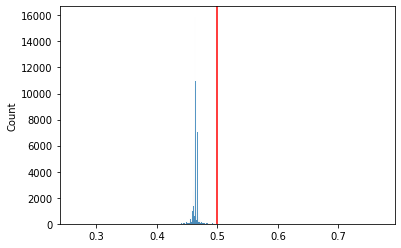

In [36]:
# 임계값 조절
import seaborn as sns

threshold = 0.5
y_train3_proba = model.predict_proba(X_train3_orcoded)[:, 1]
y_pred = y_train3_proba > threshold

ax = sns.histplot(y_train3_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

# 현재 훈련 데이터에서 임계값 이상 데이터 수 확인 : 대부분이 0으로 예측

In [38]:
pred_proba = pd.DataFrame({
    'y_train2': y_train2,
    'pred_proba': y_train3_proba})

pred_proba # 1이 나올 확률 높이기

,y_train2,pred_proba
0,0,0.463332
1,1,0.463332
2,1,0.463332
3,1,0.466075
4,1,0.459039
...,...,...
141879,0,0.462835
141880,1,0.462751
141881,0,0.462733
141882,1,0.467241


In [39]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_train2, y_train3_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.767529
1,0.000000,0.000016,0.767529
2,0.000000,0.000031,0.762009
3,0.000000,0.000265,0.758589
4,0.000000,0.000296,0.758141
...,...,...,...
5098,0.999588,1.000000,0.351196
5099,0.999613,1.000000,0.351115
5100,0.999936,1.000000,0.295622
5101,0.999961,1.000000,0.289278


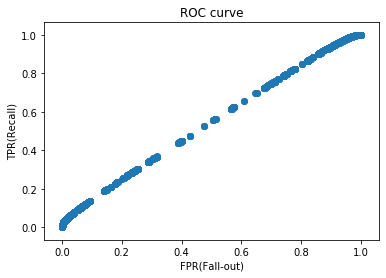

In [40]:
# ROC curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [41]:
# threshold 최대값의 인덱스, np.argmax()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold) # idx:  2281 , threshold: 0.464246 (0.5에서 변경)

idx: 2281 , threshold: 0.464246


In [42]:
threshold_change = optimal_threshold

y_pred_proba = model.predict_proba(X_train3_orcoded)[:,1] # 기존 데이터

y_train_new = [1 if y_pred_proba[i]>= threshold_change else 0 for i in range(len(y_pred_proba))] # 임계값 이상인 경우 1로 변경

pd.Series(y_train_new).value_counts()  # 변경 결과 : 0) 96344, 1) 45433

0    96344
1    45433
dtype: int64

In [43]:
# 데이터 변경 데이터 변경
y_train3 = pd.Series(y_train_new, index=y_train2.index)
y_train3

0         0
1         0
2         0
3         1
4         0
         ..
141879    0
141880    0
141881    0
141882    1
141883    0
Length: 141777, dtype: int64

In [ ]:
#y_pred_proba2 = model.predict_proba(X_val3_orcoded)[:,1] # 기존 데이터

#y_train_new2 = [1 if y_pred_proba2[i]>= threshold_change else 0 for i in range(len(y_pred_proba2))] # 임계값 이상인 경우 1로 변경

#pd.Series(y_train_new2).value_counts() # 변경 결과 : 0) 31178, 1) 4258

In [ ]:
#y_val3 = pd.Series(y_train_new2, index=y_val2.index)
#y_val3

In [44]:
# 임계치 변경한 데이터로 모델 재학습

model = XGBClassifier(max_depth=7, n_jobs=-1, learning_rate=0.1, random_state=2)

# early_stopping을 위한 평가 데이터 세트 준비
eval_set = [(X_train3_orcoded, y_train3), (X_val3_orcoded, y_val2)] # 임계치 변경 데이터 적용


# 모델 학습 및 early_stopping 반영
model.fit(X_train3_orcoded, y_train3, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=30
         ) # 30 rounds 동안 스코어 개선 없으면 멈춤 → 그 숫자를 모델에 반영 (과적합 피하기)

print('검증 정확도', model.score(X_val3_orcoded, y_val2)) # 0.518201로 정확도 오히려 하락

[0]	validation_0-error:0.049317	validation_1-error:0.482673
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.04816	validation_1-error:0.481967
[2]	validation_0-error:0.047434	validation_1-error:0.482306
[3]	validation_0-error:0.047307	validation_1-error:0.482193
[4]	validation_0-error:0.047229	validation_1-error:0.482024
[5]	validation_0-error:0.04658	validation_1-error:0.481883
[6]	validation_0-error:0.045395	validation_1-error:0.482109
[7]	validation_0-error:0.046524	validation_1-error:0.481826
[8]	validation_0-error:0.04639	validation_1-error:0.482024
[9]	validation_0-error:0.046058	validation_1-error:0.482306
[10]	validation_0-error:0.046305	validation_1-error:0.481883
[11]	validation_0-error:0.045861	validation_1-error:0.482109
[12]	validation_0-error:0.047321	validation_1-error:0.482306
[13]	validation_0-error:0.045494	validation_1-error:0.48210

 * * *
#### **5. M/L 모델 해석**  
   - PDP, SHAP을 활용한 시각화 및 설명  

#### ~~**순열 중요도** *(RAM 문제로 생략)*~~

- 내용 : 관심있는 특성만 무작위로 섞어 예측했을 때 성능 평가지표(정확도) 감소 정도 측정  
　→ 중요도 감소 = 섞지 않았을 때 - 특정 하나를 섞었을 때  
　→ 감소가 클수록 target에 영향을 많이 미치는 특성

- 특징 : 만들어놓은 모델 그대로 사용, 검증 데이터 섞기 → 예측값 및 성능 확인


In [52]:
ordinal_mapping = [
                   {'col': 'rideable_type', 'mapping': {'docked_bike':1, 'classic_bike':1, 'electric_bike':2}},
                   {'col': 'start_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'end_day', 'mapping': {'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday':4, 'Friday' : 5, 'Saturday': 6, 'Sunday': 7}},
                   {'col': 'Condition', 'mapping': {'Heavy Rain / Windy':-4, 'Heavy Rain': -4, 'Rain / Windy':-3, 'Rain': -3, 'Fog':-2, 'Haze': -2, 'Light Rain / Windy':-1, 'Light Rain': -1,
                                                    'Mostly Cloudy / Windy': 0, 'Mostly Cloudy': 0, 'Cloudy / Windy': 1, 'Cloudy': 1, 'Partly Cloudy / Windy': 2, 'Partly Cloudy': 2, 'Fair / Windy': 3, 'Fair': 3, 'Clear': 4}}
                   ]

pipe_p = Pipeline([
    ('preprocessing', make_pipeline(OneHotEncoder(cols=['start_station_id', 'end_station_id']),
                                    OrdinalEncoder(cols=['rideable_type', 'start_day', 'end_day', 'Condition'], mapping=ordinal_mapping)
                                    )),
    ('xgbc', XGBClassifier(n_estimators= 141, max_depth=7, n_jobs=-1, learning_rate=0.05, random_state=2)) 
])

# pipeline 생성 확인
pipe_p.named_steps

pipe_p.fit(X_train3, y_train2)

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('onehotencoder',
                                  OneHotEncoder(cols=['start_station_id',
                                                      'end_station_id'],
                                                drop_invariant=False,
                                                handle_missing='value',
                                                handle_unknown='value',
                                                return_df=True,
                                                use_cat_names=False,
                                                verbose=0)),
                                 ('ordinalencoder',
                                  OrdinalEncoder(cols=['rideable_type',
                                                       'start_day', 'end_day',
                                                       'Condition']...
                 XGBClass

In [ ]:
permuter = PermutationImportance(
    pipe_p.named_steps['xgbc'], # pipe에서 사용할 model 가져오기
    scoring='accuracy', # metric
    n_iter=3,               # 다른 random seed를 사용하여 3번 반복
    random_state=2     # 그 random seed를 뽑는 순서
)

X_val3_transformed = pipe_p.named_steps['preprocessing'].transform(X_val3)

permuter.fit(X_val3_transformed, y_val2)

In [ ]:
# 결과 확인 (순열중요도 목록 확인)
feature_names = X_val3.columns.tolist() # 순열은 값만 섞은 것이므로 그대로 사용
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)


# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

#### **특성 중요도 (feature importance)**

- 내 용 : 분류 시 특성이 얼마나 일찍 / 자주 분기에 사용되는지 확인 (항상 양수값)
- 한계점 : '어떤 특성들이 모델의 성능에 중요하다, 많이 쓰인다'만 확인 가능  
　　　→ 특성의 값에 따른 타겟의 영향 (증가/감소)에 대한 정보 확인 어려움

**부분의존도그림 (Partial dependence plots, PDP)**
- 내 용 : 관심있는 특성들이 타겟에 어떻게 영향을 주는지 파악
- 특 징: ICE(Individual Conditional Expectation) 곡선들의 평균  
　※ ICE 곡선 = 하나의 관측치에 대해 관심 특성을 변화시킴에 따른 타겟값 변화 곡선

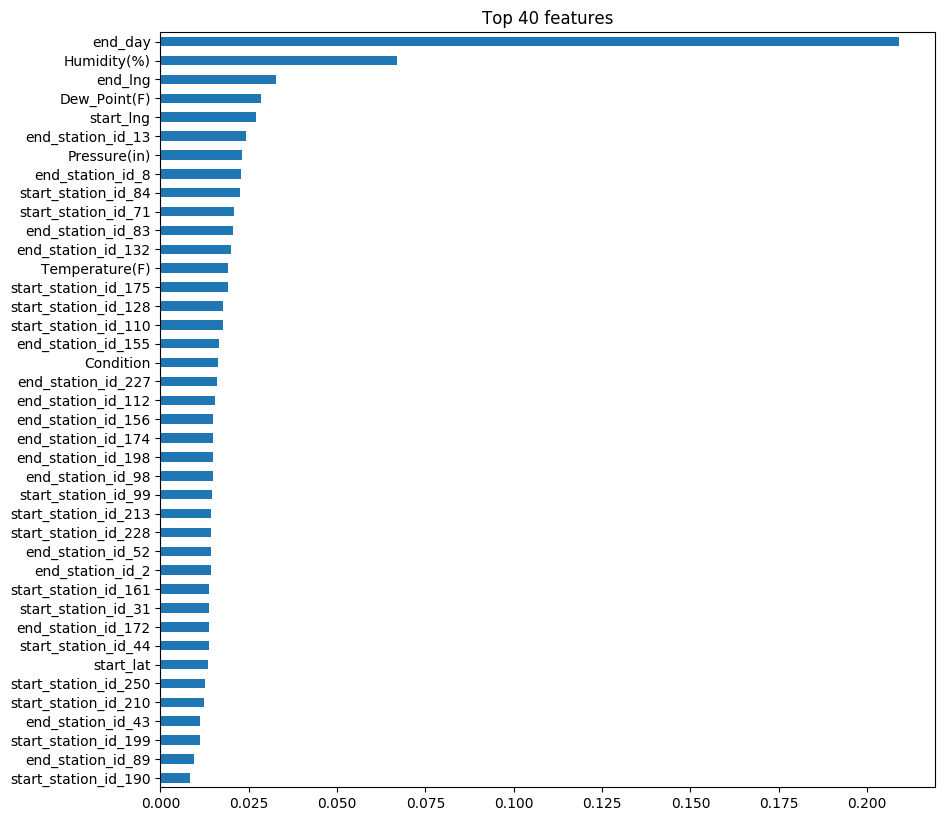

In [60]:
# 특성 중요도 확인
n=40

# 특성 중요도(onehot + ordinal 결과)
importances = pd.Series(model.feature_importances_, X_train3_orcoded.columns)

# 특성 중요도 그래프와
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# 영향 미치는 순서 : 대부분이 시작/종료 정류장

In [46]:
# 그래프 크기 조절
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


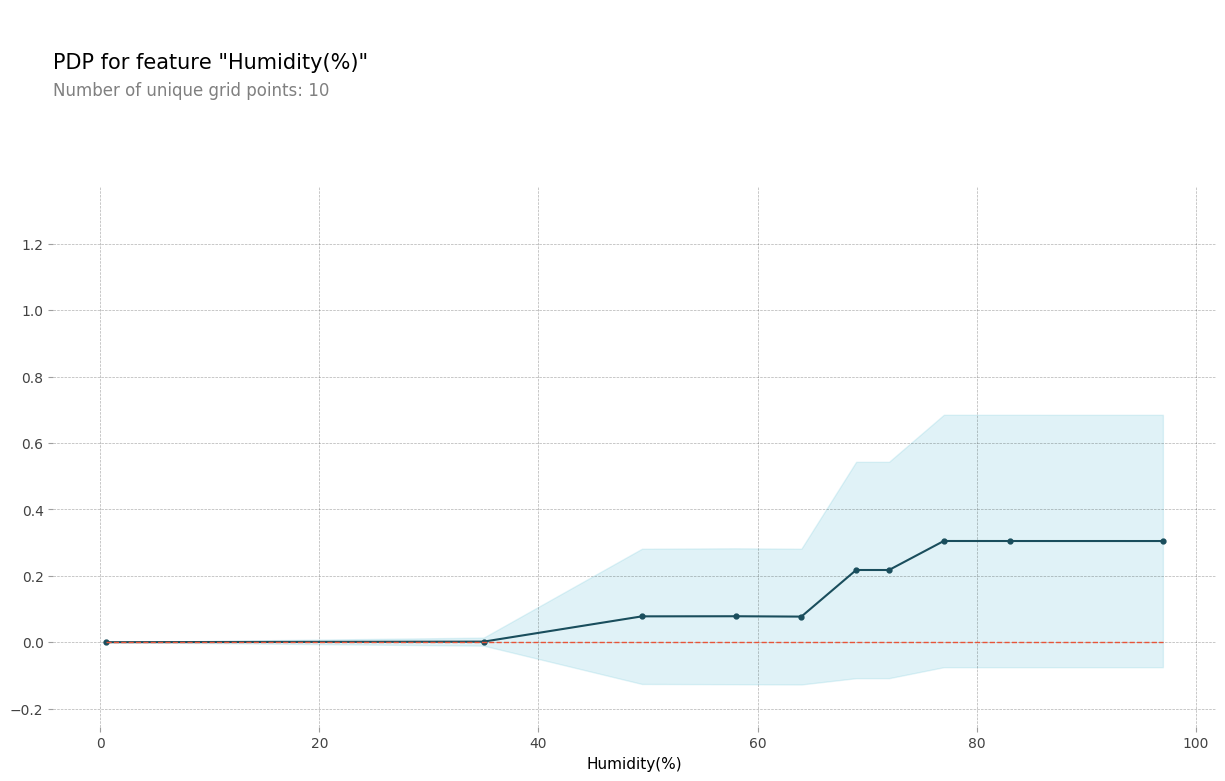

In [49]:
# PDP 분석 (특성 1개)

feature = 'Humidity(%)'

isolated = pdp_isolate(
    model=model, # 모델 변경
    dataset=X_val3_orcoded, 
    model_features=X_val3_orcoded.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

# 결과 해석

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


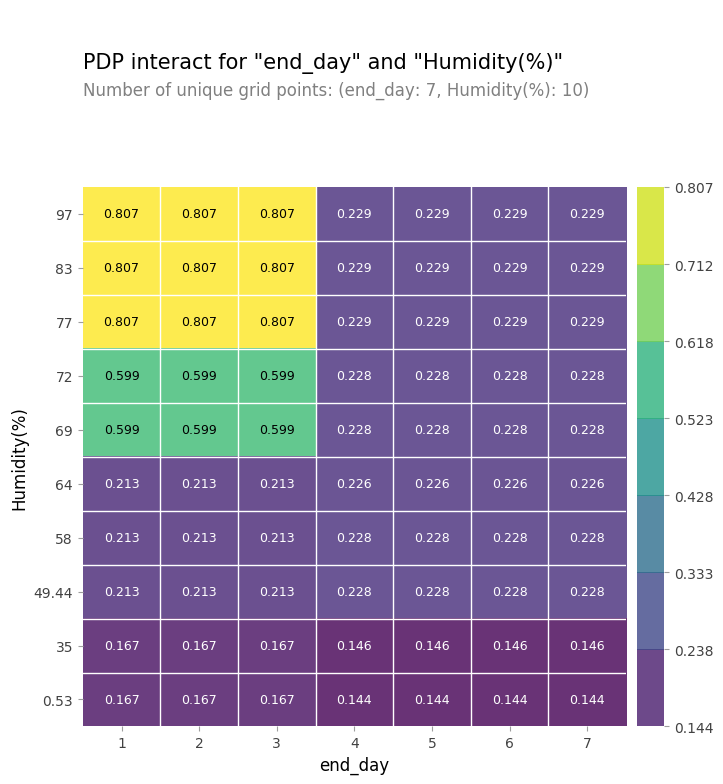

In [51]:
# PDP 분석 (특성 2개)

features = ['end_day', 'Humidity(%)']

interaction = pdp_interact(
    model=model, 
    dataset=X_val3_orcoded,
    model_features=X_val3_orcoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

# 결과 해석

**SHAP 라이브러리**
- 내용 : 단일 관측치로부터 특성들의 기여도(feature attribution) 계산 및 시각화  
　  
　<img src="https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_header.png" width="600" />  
　***그림 예시***

In [52]:
# 최종 모델에 평가 데이터 적용

# 평가 데이터 정보(y_test2)
print('target classes:',model.classes_,'\n')
print('y_test:\n',y_test2.value_counts(normalize=True))

target classes: [0 1] 

y_test:
 0    0.571296
1    0.428704
Name: member_casual, dtype: float64


In [53]:
X_test3_onecoded = onecoder.transform(X_test3)
X_test3_orcoded = orcoder.transform(X_test3_onecoded) # 평가 데이터

y_pred_test = model.predict(X_test3_orcoded)

print('평가 정확도: ', accuracy_score(y_test2, y_pred_test)) # 0.55301, 기준 모델 (0.54718) 대비 0.005 상승 (큰 차이 없음)

평가 정확도:  0.5530158615976694


**SHAP 적용, 시각화 및 설명**

In [55]:
# 평가 데이터 중 샘플 1개 선정

row = X_test3_orcoded.iloc[[7345]]
row

,rideable_type,start_station_id_1,start_station_id_2,start_station_id_3,start_station_id_4,start_station_id_5,start_station_id_6,start_station_id_7,start_station_id_8,start_station_id_9,start_station_id_10,start_station_id_11,start_station_id_12,start_station_id_13,start_station_id_14,start_station_id_15,start_station_id_16,start_station_id_17,start_station_id_18,start_station_id_19,start_station_id_20,start_station_id_21,start_station_id_22,start_station_id_23,start_station_id_24,start_station_id_25,start_station_id_26,start_station_id_27,start_station_id_28,start_station_id_29,start_station_id_30,start_station_id_31,start_station_id_32,start_station_id_33,start_station_id_34,start_station_id_35,start_station_id_36,start_station_id_37,start_station_id_38,start_station_id_39,...,end_station_id_231,end_station_id_232,end_station_id_233,end_station_id_234,end_station_id_235,end_station_id_236,end_station_id_237,end_station_id_238,end_station_id_239,end_station_id_240,end_station_id_241,end_station_id_242,end_station_id_243,end_station_id_244,end_station_id_245,end_station_id_246,end_station_id_247,end_station_id_248,end_station_id_249,end_station_id_250,end_station_id_251,end_station_id_252,end_station_id_253,end_station_id_254,end_station_id_255,start_lat,start_lng,end_lat,end_lng,start_day,end_day,hour,riding_time(min),distance(km),Temperature(F),Dew_Point(F),Humidity(%),Wind_Speed(mph),Pressure(in),Condition
7345,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.788327,-122.391492,37.790717,-122.390931,3,3,11.0,57.0,0.27036,58.0,47.0,67.0,6.0,29.78,1.0


In [56]:
# 실제 평가 데이터(target) 결과

y_test2.iloc[[7345]]    # member

7348    1
Name: member_casual, dtype: int64

In [58]:
# 모델 예측값

model.predict(row)[0]   # casual (실제 값과 틀림)

0

In [59]:
# 다르게 예측한 이유 확인

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()

shap.force_plot(
    base_value=explainer.expected_value, # -1.053
    shap_values=shap_values,
    features=row
)

* * *
#### **6. 마무리 및 결과 정리**

   - 성능 결과 분석
    1. 기준 모델 성능 : 0.54718
    2. 모델 학습 결과 → *모두 기준 모델 대비 저하*   
    　- 결정 나무 : 0.54712  
    　- 랜덤 포레스트 : 0.54712   
    　- **XGB (최종 모델)** : 0.54715 → 0.5530  
    　└ RandomizedSearchCV : 0.54509  
    　　→ 하이퍼 파라미터 조절, 성능 개선 여부 확인 (다양한 조건에서 최적화 확인 가능)  
    　└ Threshold 변경 : 0.5182  
 
   - 최종 모델 관련 설명
    1. 관측치 예측을 위해 모델이 활용한 특성 (top 5)  
    　- end_day, Humidity(%), end_lng, Dew_point(F), start_lng  

    2. 모델의 예측에 도움이 되는 특성 및 구하는 방법  
    　- 특성 : 1번 결과와 동일  
    　- 방법 : 날짜 데이터의 추가 가공, 해당 지역 날씨 데이터 수집 등  

   - 성능 저하 이유
    1. 가설 설정  
   　- 해당 데이터로 일반 고객/회원을 분류(예측)할 수 있다고 생각하였으나,  
   　　진행 결과, 월별 사용 이력 분석이 더 알맞은 데이터인 것으로 사료

    2. 데이터 수집 및 전처리    
    　- 실제 업체 서비스 이용 데이터를 활용하였으나, 개인 정보 관련 삭제로  
  　　target과 연관 있는 특성이 부족  
    　- target과 연관된 특성 내용 분석, 조합 등(데이터 질)이 부족하여  
    　　모델을 만들어도 예측에 큰 효과가 없음 (*Garbage in Garbage out*)  